<a href="https://colab.research.google.com/github/juanlucas7/Regressao_Marketing/blob/main/Regressao_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CONSTRUINDO UM MODELO DE REGRESSÃO PARA MARKETING ⏭


- ANÁLISE DESCRITIVA:
    Compreender as variáveis;
- ANÁLISE EXPLORATÓRIA:
    Identificar as relações entre as variáveis;
- MODELAGEM DOS DADOS;
- PREDIÇÃO;
- VERIFICAÇÃO DA EFICÁCIA DO MODELO.


In [ ]:
# IMPORTANDO BIBLIOTECAS QUE VÃO SER UTILIZADAS NA ANÁLISE

import pandas as pd
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import chart_studio.plotly as py
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf

In [ ]:
# IMPORTANDO A BASE DE DADOS PARA ANÁLISE


df = pd.read_csv("/content/MKT.csv")

df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [ ]:
# VERIFICAÇÃO DO TIPO DOS DADOS

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [ ]:
df.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


In [ ]:
df.isna().sum()

youtube      0
facebook     0
newspaper    0
sales        0
dtype: int64

In [ ]:
df.isnull().sum()

youtube      0
facebook     0
newspaper    0
sales        0
dtype: int64

In [ ]:
df.duplicated().sum()

0

# ANÁLISE EXPLORATÓRIA DOS DADOS

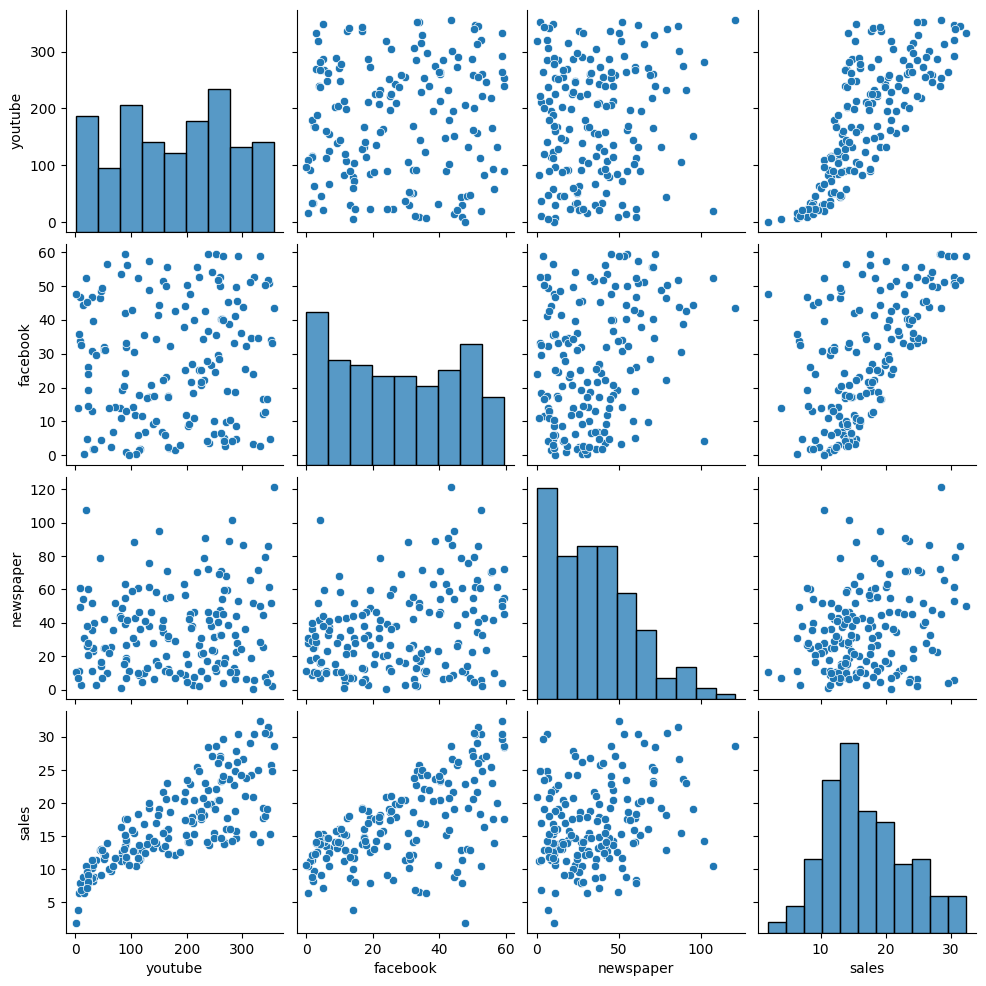

In [ ]:
# PLOTANDO TODOS OS TIPOS DE GRÁFICOS EM RELAÇÃO AS COLUNAS DA BASE DE DADOS

sns.pairplot(df)

In [ ]:
# CRIANDO UM 'BOX PLOT' PARA ENTENDER SE EXISTEM VALORES QUE ESTÃO DESTOANDO

fig = px.box(df, x = "youtube")
fig.update_traces(line_color = 'blue')

In [ ]:
fig = px.box(df, x = "facebook")
fig.update_traces(line_color = 'blue')

In [ ]:
fig = px.box(df, x = "newspaper")
fig.update_traces(line_color = 'blue')

In [ ]:
df.columns

Index(['youtube', 'facebook', 'newspaper', 'sales'], dtype='object')

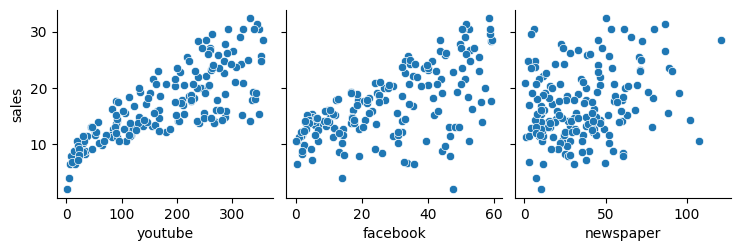

In [ ]:
#PLOTANDO AS VARIÁVEIS DA BASE DE DADOS EM RELAÇÃO ÀS VENDAS

sns.pairplot(df, x_vars = ['youtube',
                           'facebook',
                           'newspaper'],
                        y_vars = 'sales')

In [ ]:
# CORRELACIONANDO OS DADOS

df.corr()

,youtube,facebook,newspaper,sales
youtube,1.000000,0.086538,0.110759,0.782030
facebook,0.086538,1.000000,0.293425,0.602918
newspaper,0.110759,0.293425,1.000000,0.254987
sales,0.782030,0.602918,0.254987,1.000000


<Axes: >

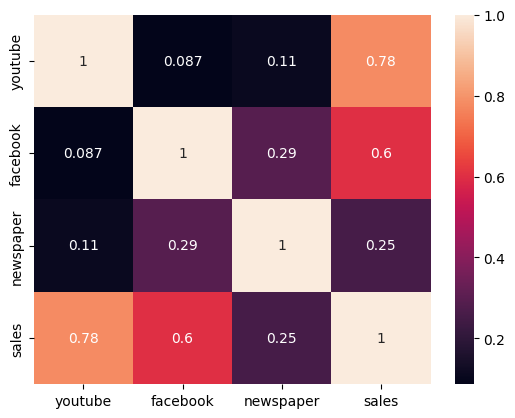

In [ ]:
# GERANDO OS 'HEATMAP' DA CORRELAÇÃO DOS DADOS

sns.heatmap(df.corr(), annot = True)

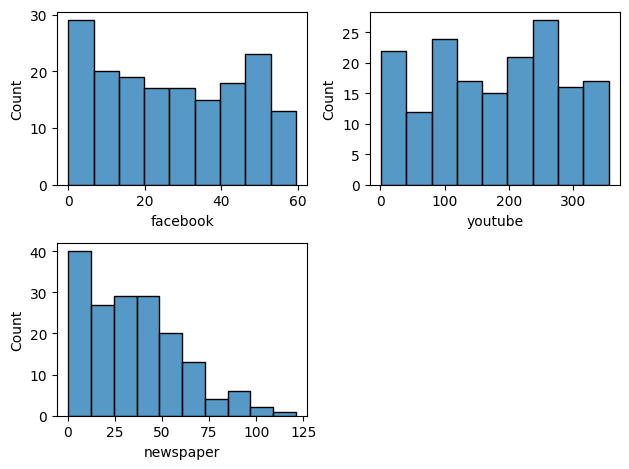

In [ ]:
# GERANDO HISTOGRAMAS

plt.subplot(2,2,1)
sns.histplot(df['facebook'])
plt.subplot(2,2,2)
sns.histplot(df['youtube'])
plt.subplot(2,2,3)
sns.histplot(df['newspaper'])

plt.tight_layout()

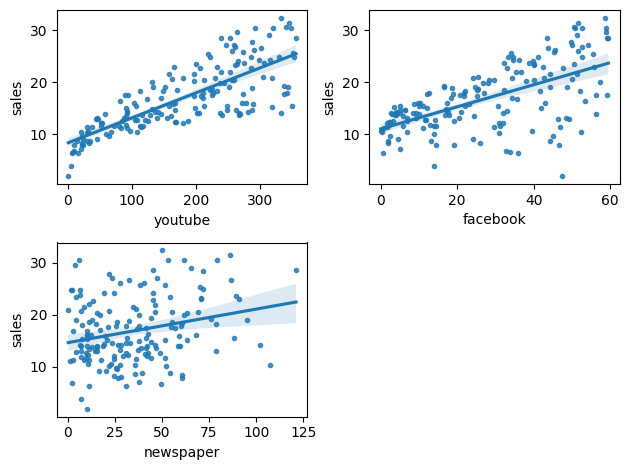

In [ ]:
plt.subplot(2,2,1)
sns.regplot(df["youtube"], x = df["youtube"], y = df["sales"],marker=".", fit_reg=True)
plt.subplot(2,2,2)
sns.regplot(df["facebook"],x = df["facebook"], y = df["sales"],marker=".",fit_reg=True)
plt.subplot(2,2,3)
sns.regplot(df["newspaper"],x = df["newspaper"], y = df["sales"],marker=".",fit_reg=True)
plt.tight_layout()

In [ ]:
# IDENTIFICANDO VALORES COM DISPARIDADE (OUTLIERS) EM NEWSPAPER

df.loc[df['newspaper'] > 100, 'newspaper']

46     107.28
72     121.08
136    101.76
Name: newspaper, dtype: float64

# MODELAGEM DOS DADOS

In [ ]:
# DIVIDINDO A COLUNA DE 'SALES' DO MODELO

X = df.drop(columns = ['sales'])
Y = df['sales'].to_frame(name = 'sales')


In [ ]:
display(X,Y)

,youtube,facebook,newspaper
0,84.72,19.20,48.96
1,351.48,33.96,51.84
2,135.48,20.88,46.32
3,116.64,1.80,36.00
4,318.72,24.00,0.36
...,...,...,...
166,45.84,4.44,16.56
167,113.04,5.88,9.72
168,212.40,11.16,7.68
169,340.32,50.40,79.44


,sales
0,12.60
1,25.68
2,14.28
3,11.52
4,20.88
...,...
166,9.12
167,11.64
168,15.36
169,30.60


In [ ]:
# IMPORTANDO A BASE DE TREINO E TESTE PARA O MODELO PROPOSTO

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state = 42)

In [ ]:
#VERIFICANDO O TAMANHO DAS BASES SELECIONADAS

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(136, 3)
(35, 3)
(136, 1)
(35, 1)


In [ ]:
# TREINAMENTO DO MODELO

ln = ln.fit(X_train, Y_train)

In [ ]:
# VERIFICAÇÃO DO R² DO TREINO
ln_qq = ln.score(X_train, Y_train)
ln_qq

0.9074962891333168

In [ ]:
# PREDIÇÃO DO TREINO

Y_pred_train = ln.predict(X_train)
ln = LinearRegression().fit(X_test, Y_test)

In [ ]:
# PREDIÇÃO DO RESULTADO DO TESTE

ln_qq2 = ln.score(X_test, Y_test)
ln_qq2

0.8925835445734595

In [ ]:
# PREVENDO O RESULTADO DO TESTE

Y_pred_test = ln.predict(X_test)

In [ ]:
function="sales~youtube+facebook"
model = smf.ols(formula = function, data = df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     757.8
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           8.33e-85
Time:                        01:58:14   Log-Likelihood:                -360.21
No. Observations:                 171   AIC:                             726.4
Df Residuals:                     168   BIC:                             735.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5937      0.376      9.555      0.0

# GRÁFICO DE COMPARAÇÃO DA VARIÁVEL TARGET COM O VALOR PREDITO PELO MODELO

<Axes: >

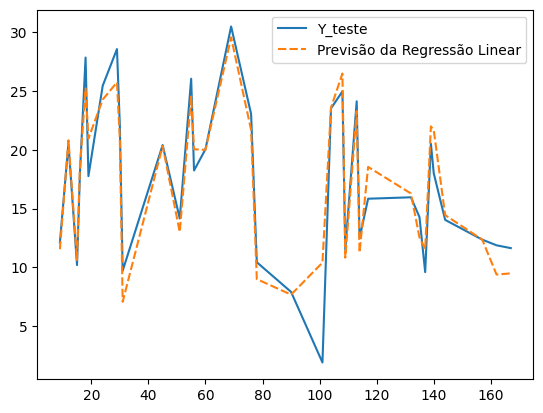

In [ ]:
dados = pd.DataFrame()
dados["Y_teste"] = Y_test
dados["Previsão da Regressão Linear"] = Y_pred_test
sns.lineplot(data = dados)

In [ ]:
dados

,Y_teste,Previsão da Regressão Linear
101,1.92,10.404581
55,26.04,24.528014
56,18.24,20.040934
139,20.52,21.990620
157,12.36,12.360362
78,10.44,9.007425
135,14.28,12.545734
104,23.52,23.587688
109,11.52,10.828551
108,24.96,26.479141
